<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Fake News Detection</h2> 
<br>

<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data collection](#1)
   #### [2. Data Preparocessing](#2)
   #### [3. Explory Data Analysis](#3)
   #### [4. Data Cleaning](#4)
   #### [5. Tokenization and Padding](#5)
   #### [6. Model Training & Evaluation](#6)
   #### [7. Deployment](#7)

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 1. Data collection</h2>



#### Source : [https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from PIL import Image

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# TensorFlow Core
import tensorflow as tf

# Keras Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

# Keras Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Keras Layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional

<a id=""></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 2. Data Preprocessing</h2>

In [2]:
# load the data
df_true = pd.read_csv('../data/True.csv')

In [3]:
df_fake = pd.read_csv('../data/Fake.csv')

In [4]:
df_true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [5]:
df_fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [6]:
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

In [7]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [11]:
# add a target class columlns to indicate wheather the news is real or fake
df_fake['target'] = 0

In [12]:
df_fake.head(2)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [13]:
df_true['target'] = 1

In [14]:
df_true.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [15]:
# concatenate the two dataframes
df = pd.concat([df_true,df_fake]).reset_index(drop=True)

In [16]:
df.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [17]:
df.shape

(44898, 5)

In [18]:
df.duplicated().sum()

209

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(44689, 5)

In [21]:
df.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [22]:
# drop subject and date columns
df = df.drop(columns=['date','subject'])

In [23]:
df.head(2)

,title,text,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1


In [24]:
# combine titile and text together
df['content'] = df['title'] + ' ' + df['text']

In [25]:
df.head(2)

,title,text,target,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...


<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 3. Exploratory Data Analysis (EDA)</h2>

<Axes: xlabel='target', ylabel='count'>

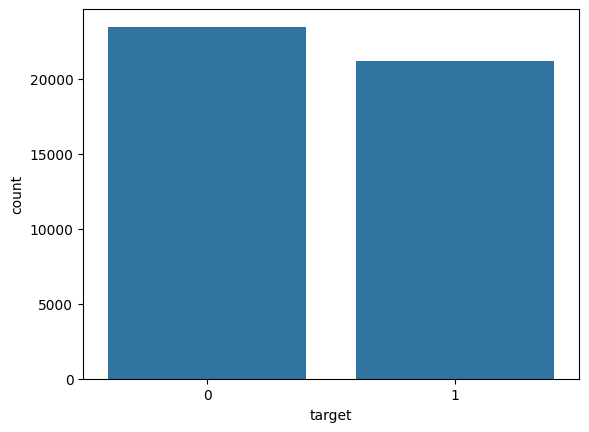

In [26]:
sns.countplot(x='target',data=df)

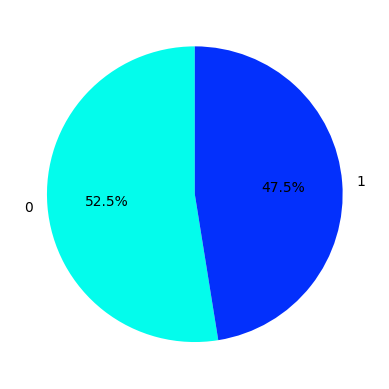

In [27]:
label_counts = df['target'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#03fcec','#0330fc'])
plt.show()

In [28]:
# create number of sentences
df['num_characters'] = df['content'].apply(len)

In [29]:
df.head(3)

,title,text,target,content,num_characters
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,4142
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850


In [30]:
# crete number of words
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head(2)

,title,text,target,content,num_characters,num_words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,4142,723


In [32]:
# create number of sentences
df['num_sentences'] = df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head(2)

,title,text,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,4142,723,21


In [34]:
df.loc[0]

title             As U.S. budget fight looms, Republicans flip t...
text              WASHINGTON (Reuters) - The head of a conservat...
target                                                            1
content           As U.S. budget fight looms, Republicans flip t...
num_characters                                                 4724
num_words                                                       896
num_sentences                                                    30
Name: 0, dtype: object

In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,44689.000000,44689.000000,44689.000000
mean,2548.274005,467.756786,14.988006
std,2174.594406,395.267696,12.676240
min,31.000000,5.000000,1.000000
25%,1314.000000,240.000000,7.000000
50%,2268.000000,417.000000,13.000000
75%,3186.000000,587.000000,19.000000
max,51893.000000,9970.000000,321.000000


In [36]:
wordcloud_mask=np.array(Image.open("../img/batman.png"))

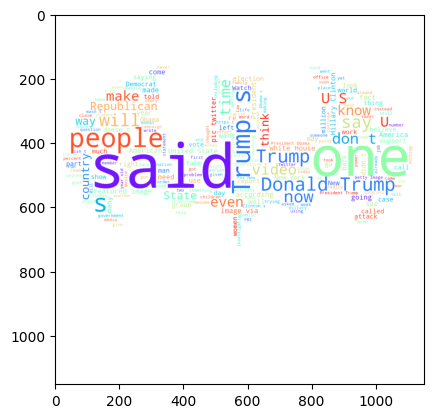

In [37]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

spam_wc = wc.generate(df[df['target'] == 0]['content'].str.cat(sep=' '))

plt.imshow(spam_wc)

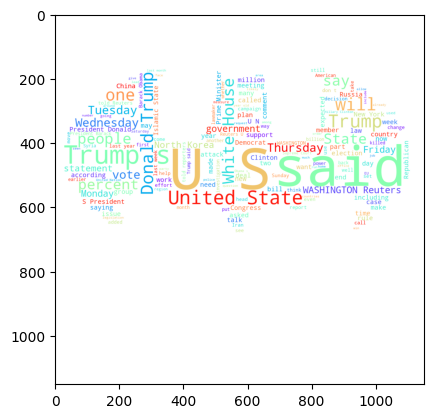

In [38]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

spam_wc = wc.generate(df[df['target'] == 1]['content'].str.cat(sep=' '))

plt.imshow(spam_wc)

Word Count

In [39]:
df.head(1)

,title,text,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30


In [40]:
corpus = []
for news in df['content'].tolist():
    for word in news.split():
        corpus.append(word)

In [41]:
len(corpus)

18654518

In [42]:
from collections import Counter

In [43]:
len(Counter(corpus))

421945

In [44]:
Counter(corpus)

Counter({'the': 901947,
         'to': 535745,
         'of': 439071,
         'and': 391856,
         'a': 388859,
         'in': 325244,
         'that': 220207,
         'on': 184068,
         's': 171422,
         'for': 168514,
         'is': 160122,
         'with': 114772,
         'was': 113757,
         'Trump': 111030,
         'he': 105447,
         'The': 98898,
         'as': 97267,
         'by': 92879,
         'said': 92293,
         'his': 91867,
         'it': 87668,
         'has': 87487,
         'be': 81542,
         'have': 81245,
         'from': 78673,
         'not': 76652,
         'are': 70158,
         'at': 69749,
         'who': 67679,
         'an': 64937,
         'this': 57019,
         'they': 54650,
         'would': 54255,
         'I': 53545,
         'U.S.': 49972,
         'about': 48587,
         'will': 48316,
         'their': 45935,
         'had': 45288,
         'been': 42059,
         't': 41936,
         'but': 41400,
         'were': 3985

In [45]:
Counter(corpus).most_common(30)

[('the', 901947),
 ('to', 535745),
 ('of', 439071),
 ('and', 391856),
 ('a', 388859),
 ('in', 325244),
 ('that', 220207),
 ('on', 184068),
 ('s', 171422),
 ('for', 168514),
 ('is', 160122),
 ('with', 114772),
 ('was', 113757),
 ('Trump', 111030),
 ('he', 105447),
 ('The', 98898),
 ('as', 97267),
 ('by', 92879),
 ('said', 92293),
 ('his', 91867),
 ('it', 87668),
 ('has', 87487),
 ('be', 81542),
 ('have', 81245),
 ('from', 78673),
 ('not', 76652),
 ('are', 70158),
 ('at', 69749),
 ('who', 67679),
 ('an', 64937)]

In [46]:
pd.DataFrame(Counter(corpus).most_common(30))

,0,1
0,the,901947
1,to,535745
2,of,439071
3,and,391856
4,a,388859
5,in,325244
6,that,220207
7,on,184068
8,s,171422
9,for,168514


In [47]:
# Count the most common 30 words
word_counts = Counter(corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

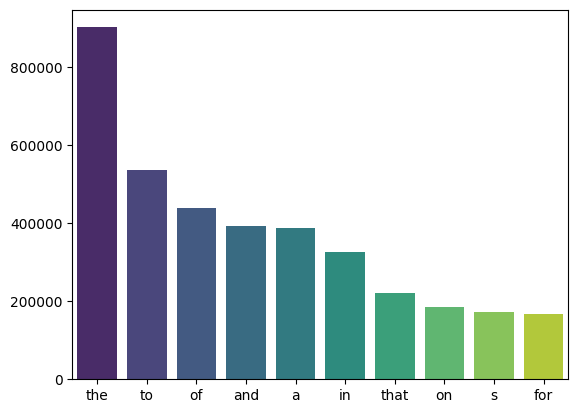

In [48]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [49]:
df.head(1)

,title,text,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30


In [50]:
fake_corpus = []
for news in df[df['target'] == 0]['content'].tolist():
    for word in news.split():
        fake_corpus.append(word)

In [51]:
fake_corpus

['Donald',
 'Trump',
 'Sends',
 'Out',
 'Embarrassing',
 'New',
 'Year’s',
 'Eve',
 'Message;',
 'This',
 'is',
 'Disturbing',
 'Donald',
 'Trump',
 'just',
 'couldn',
 't',
 'wish',
 'all',
 'Americans',
 'a',
 'Happy',
 'New',
 'Year',
 'and',
 'leave',
 'it',
 'at',
 'that.',
 'Instead,',
 'he',
 'had',
 'to',
 'give',
 'a',
 'shout',
 'out',
 'to',
 'his',
 'enemies,',
 'haters',
 'and',
 'the',
 'very',
 'dishonest',
 'fake',
 'news',
 'media.',
 'The',
 'former',
 'reality',
 'show',
 'star',
 'had',
 'just',
 'one',
 'job',
 'to',
 'do',
 'and',
 'he',
 'couldn',
 't',
 'do',
 'it.',
 'As',
 'our',
 'Country',
 'rapidly',
 'grows',
 'stronger',
 'and',
 'smarter,',
 'I',
 'want',
 'to',
 'wish',
 'all',
 'of',
 'my',
 'friends,',
 'supporters,',
 'enemies,',
 'haters,',
 'and',
 'even',
 'the',
 'very',
 'dishonest',
 'Fake',
 'News',
 'Media,',
 'a',
 'Happy',
 'and',
 'Healthy',
 'New',
 'Year,',
 'President',
 'Angry',
 'Pants',
 'tweeted.',
 '2018',
 'will',
 'be',
 'a',
 'g

In [52]:
len(fake_corpus)

10282344

In [53]:
len(Counter(fake_corpus))

315558

In [54]:
Counter(fake_corpus)

Counter({'the': 483987,
         'to': 287152,
         'of': 234147,
         'and': 213972,
         'a': 203402,
         'in': 153413,
         'that': 138512,
         's': 127620,
         'is': 105934,
         'for': 88820,
         'on': 77310,
         'Trump': 70642,
         'was': 66521,
         'he': 62200,
         'with': 60906,
         'his': 55884,
         'it': 53997,
         'as': 51647,
         'be': 47568,
         'by': 45927,
         'have': 45352,
         'are': 44596,
         'The': 44451,
         'I': 42641,
         'has': 41812,
         'not': 41173,
         'this': 41078,
         'who': 40653,
         'from': 39458,
         't': 39418,
         'at': 38419,
         'they': 37026,
         'an': 34035,
         'about': 31740,
         'you': 30582,
         'their': 29606,
         'we': 26306,
         'or': 23606,
         'her': 23411,
         'but': 23259,
         'will': 23145,
         'would': 23052,
         'been': 22754,
        

In [55]:
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,the,483987
1,to,287152
2,of,234147
3,and,213972
4,a,203402
5,in,153413
6,that,138512
7,s,127620
8,is,105934
9,for,88820


In [56]:
len(Counter(fake_corpus))

315558

In [57]:
# Count the most common 30 words
word_counts = Counter(fake_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

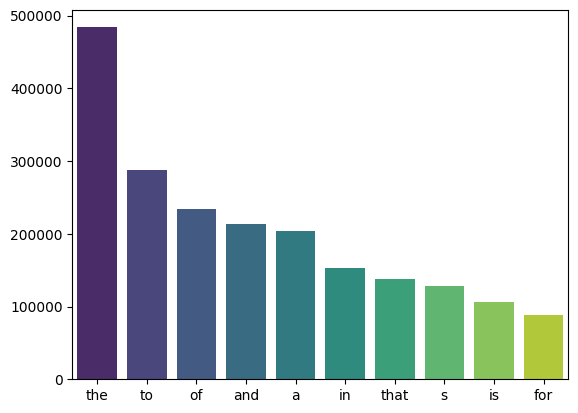

In [58]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [59]:
df.head(1)

,title,text,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30


In [60]:
real_corpus = []
for news in df[df['target'] == 1]['content'].tolist():
    for word in news.split():
        real_corpus.append(word)

In [61]:
real_corpus

['As',
 'U.S.',
 'budget',
 'fight',
 'looms,',
 'Republicans',
 'flip',
 'their',
 'fiscal',
 'script',
 'WASHINGTON',
 '(Reuters)',
 '-',
 'The',
 'head',
 'of',
 'a',
 'conservative',
 'Republican',
 'faction',
 'in',
 'the',
 'U.S.',
 'Congress,',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts,',
 'called',
 'himself',
 'a',
 '“fiscal',
 'conservative”',
 'on',
 'Sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 '2018.',
 'In',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'Republicans,',
 'U.S.',
 'Representative',
 'Mark',
 'Meadows,',
 'speaking',
 'on',
 'CBS’',
 '“Face',
 'the',
 'Nation,”',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending,',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'January.',
 'When',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'Wednesday,',
 'law

In [62]:
len(real_corpus)

8372174

In [63]:
len(Counter(real_corpus))

184343

In [64]:
Counter(real_corpus)

Counter({'the': 417960,
         'to': 248593,
         'of': 204924,
         'a': 185457,
         'and': 177884,
         'in': 171831,
         'on': 106758,
         'that': 81695,
         'for': 79694,
         'said': 71171,
         'The': 54447,
         'is': 54188,
         'with': 53866,
         'was': 47236,
         'by': 46952,
         'has': 45675,
         'as': 45620,
         's': 43802,
         'he': 43247,
         'U.S.': 41674,
         'Trump': 40388,
         'from': 39215,
         'his': 35983,
         'have': 35893,
         'not': 35479,
         'be': 33974,
         'it': 33671,
         'at': 31330,
         'would': 31203,
         '-': 31112,
         'an': 30902,
         'who': 27026,
         'are': 25562,
         'had': 25226,
         'will': 25171,
         'said.': 21317,
         '(Reuters)': 21033,
         'its': 20781,
         'which': 20426,
         'been': 19305,
         'were': 18598,
         'after': 18541,
         'but': 1814

In [65]:
Counter(real_corpus).most_common(30)

[('the', 417960),
 ('to', 248593),
 ('of', 204924),
 ('a', 185457),
 ('and', 177884),
 ('in', 171831),
 ('on', 106758),
 ('that', 81695),
 ('for', 79694),
 ('said', 71171),
 ('The', 54447),
 ('is', 54188),
 ('with', 53866),
 ('was', 47236),
 ('by', 46952),
 ('has', 45675),
 ('as', 45620),
 ('s', 43802),
 ('he', 43247),
 ('U.S.', 41674),
 ('Trump', 40388),
 ('from', 39215),
 ('his', 35983),
 ('have', 35893),
 ('not', 35479),
 ('be', 33974),
 ('it', 33671),
 ('at', 31330),
 ('would', 31203),
 ('-', 31112)]

In [66]:
pd.DataFrame(Counter(real_corpus).most_common(30))

,0,1
0,the,417960
1,to,248593
2,of,204924
3,a,185457
4,and,177884
5,in,171831
6,on,106758
7,that,81695
8,for,79694
9,said,71171


In [67]:
# Count the most common 30 words
word_counts = Counter(real_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

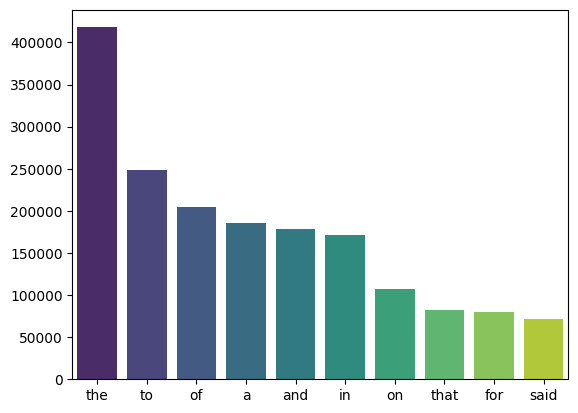

In [68]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 4. Data Cleaning</h2>

In [69]:
df.head(2)

,title,text,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,U.S. military to accept transgender recruits o...,4142,723,21


In [70]:
df.shape

(44689, 7)

In [71]:
df = df.drop(columns=['title','text','num_characters','num_words','num_sentences'])

In [72]:
df.head(2)

,target,content
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...


In [73]:
df.loc[0]

target                                                     1
content    As U.S. budget fight looms, Republicans flip t...
Name: 0, dtype: object

In [74]:
# Initialize stop words
stop_words = set(stopwords.words('english'))

In [75]:
def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    # Step 2: Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Step 3: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Step 4: Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Step 5: Tokenize text
    words = word_tokenize(text)
    # Step 6: Remove stop words
    words = [word for word in words if word not in stop_words]
    # Step 7: Join words back into a single string
    processed_text = ' '.join(words)

    return processed_text

In [76]:
# Example usage
sample_text = "Visit https://example.com for more information! <p>This is a sample text with HTML tags.</p>"
cleaned_text = preprocess_text(sample_text)
print(cleaned_text)

visit information sample text html tags


In [77]:
df['clean_text'] = df['content'].apply(preprocess_text)

In [78]:
df.head(10)

,target,content,clean_text
0,1,"As U.S. budget fight looms, Republicans flip t...",us budget fight looms republicans flip fiscal ...
1,1,U.S. military to accept transgender recruits o...,us military accept transgender recruits monday...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior us republican senator let mr mueller jo...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge much amazon ...
5,1,"White House, Congress prepare for talks on spe...",white house congress prepare talks spending im...
6,1,"Trump says Russia probe will be fair, but time...",trump says russia probe fair timeline unclear ...
7,1,Factbox: Trump on Twitter (Dec 29) - Approval ...,factbox trump twitter dec approval rating amaz...
8,1,Trump on Twitter (Dec 28) - Global Warming The...,trump twitter dec global warming following sta...
9,1,Alabama official to certify Senator-elect Jone...,alabama official certify senatorelect jones to...


In [79]:
df = df.drop(columns='content')

In [80]:
df.head()

,target,clean_text
0,1,us budget fight looms republicans flip fiscal ...
1,1,us military accept transgender recruits monday...
2,1,senior us republican senator let mr mueller jo...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump wants postal service charge much amazon ...


In [81]:
df.to_csv('../artifact/clean_content.csv',index=False)

In [82]:
df = pd.read_csv('../artifact/clean_content.csv')

In [83]:
df.head(3)

,target,clean_text
0,1,us budget fight looms republicans flip fiscal ...
1,1,us military accept transgender recruits monday...
2,1,senior us republican senator let mr mueller jo...


In [84]:
df.shape

(44689, 2)

In [85]:
corpus = []
for news in df['clean_text'].tolist():
    if isinstance(news, str):  # Check if the value is a string
        for word in news.split():
            corpus.append(word)

In [86]:
len(corpus)

10624132

In [87]:
len(Counter(corpus))

211876

In [88]:
Counter(corpus).most_common(30)

[('said', 129065),
 ('trump', 127967),
 ('us', 67761),
 ('would', 55069),
 ('president', 52390),
 ('people', 41465),
 ('one', 36158),
 ('new', 32541),
 ('state', 32132),
 ('also', 31031),
 ('house', 28790),
 ('reuters', 28536),
 ('donald', 28483),
 ('clinton', 27384),
 ('states', 27204),
 ('obama', 27203),
 ('government', 26885),
 ('republican', 25254),
 ('could', 24178),
 ('white', 23769),
 ('united', 23446),
 ('told', 23368),
 ('like', 22494),
 ('campaign', 21641),
 ('news', 21026),
 ('last', 20520),
 ('election', 20218),
 ('two', 20201),
 ('time', 19912),
 ('party', 19220)]

In [89]:
pd.DataFrame(Counter(corpus).most_common(30))

,0,1
0,said,129065
1,trump,127967
2,us,67761
3,would,55069
4,president,52390
5,people,41465
6,one,36158
7,new,32541
8,state,32132
9,also,31031


In [90]:
# Count the most common 30 words
word_counts = Counter(corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

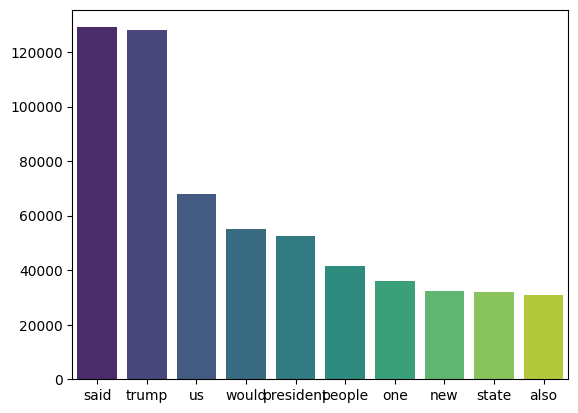

In [91]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [93]:
df.head(2)

,target,clean_text
0,1,us budget fight looms republicans flip fiscal ...
1,1,us military accept transgender recruits monday...


In [96]:
fake_corpus = []
for news in df[df['target'] == 0]['clean_text'].dropna().tolist():
    if isinstance(news, str):  # Check if news is a string
        for word in news.split():
            fake_corpus.append(word)

In [97]:
len(fake_corpus)

5659484

In [98]:
len(Counter(fake_corpus))

174838

In [99]:
Counter(fake_corpus).most_common(30)

[('trump', 81157),
 ('said', 31207),
 ('president', 26667),
 ('people', 26449),
 ('would', 23678),
 ('one', 23513),
 ('us', 23095),
 ('obama', 19624),
 ('clinton', 18972),
 ('donald', 18054),
 ('like', 17996),
 ('video', 16132),
 ('hillary', 15329),
 ('also', 15268),
 ('new', 15042),
 ('news', 14990),
 ('even', 13895),
 ('white', 13610),
 ('time', 12998),
 ('state', 12957),
 ('media', 11634),
 ('via', 11286),
 ('america', 11108),
 ('house', 11097),
 ('get', 11064),
 ('campaign', 11023),
 ('know', 10439),
 ('could', 10418),
 ('first', 10331),
 ('american', 10269)]

In [102]:
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,trump,81157
1,said,31207
2,president,26667
3,people,26449
4,would,23678
5,one,23513
6,us,23095
7,obama,19624
8,clinton,18972
9,donald,18054


In [103]:
# Count the most common 30 words
word_counts = Counter(fake_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

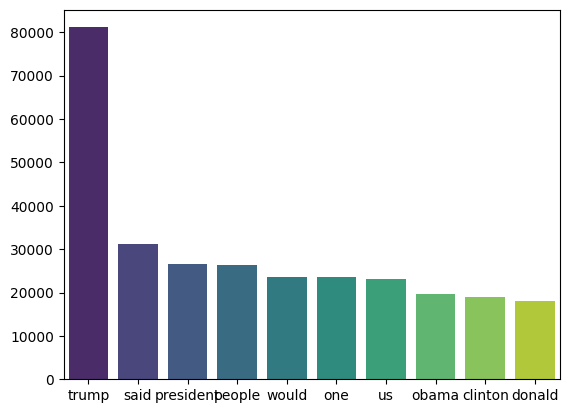

In [104]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [106]:
real_corpus = []
for news in df[df['target'] == 1]['clean_text'].dropna().tolist():
    if isinstance(news, str):  # Check if news is a string
        for word in news.split():
            real_corpus.append(word)

In [107]:
len(real_corpus)

4964648

In [108]:
len(Counter(real_corpus))

78551

In [109]:
Counter(real_corpus).most_common(30)

[('said', 97858),
 ('trump', 46810),
 ('us', 44666),
 ('would', 31391),
 ('reuters', 28168),
 ('president', 25723),
 ('state', 19175),
 ('government', 18111),
 ('house', 17693),
 ('states', 17588),
 ('new', 17499),
 ('republican', 15837),
 ('also', 15763),
 ('united', 15401),
 ('people', 15016),
 ('told', 14112),
 ('could', 13760),
 ('one', 12645),
 ('last', 12548),
 ('trumps', 12318),
 ('washington', 12172),
 ('election', 11867),
 ('two', 11695),
 ('party', 11531),
 ('year', 10972),
 ('former', 10759),
 ('campaign', 10618),
 ('north', 10548),
 ('donald', 10429),
 ('security', 10267)]

In [110]:
pd.DataFrame(Counter(real_corpus).most_common(30))

,0,1
0,said,97858
1,trump,46810
2,us,44666
3,would,31391
4,reuters,28168
5,president,25723
6,state,19175
7,government,18111
8,house,17693
9,states,17588


In [111]:
# Count the most common 30 words
word_counts = Counter(real_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_7548\1200580220.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

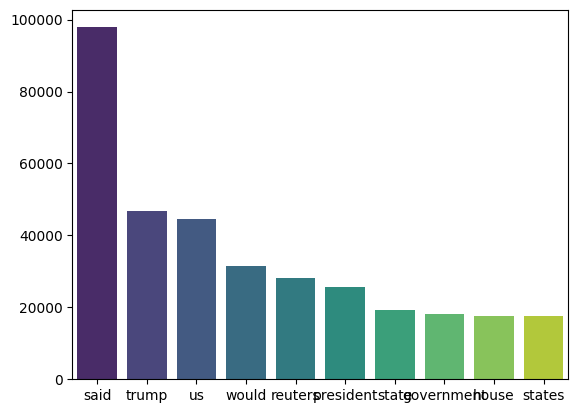

In [112]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

Wordcloud

In [115]:
df.head(1)

,target,clean_text
0,1,us budget fight looms republicans flip fiscal ...


In [113]:
wordcloud_mask=np.array(Image.open("../img/mask-butterfly.png"))

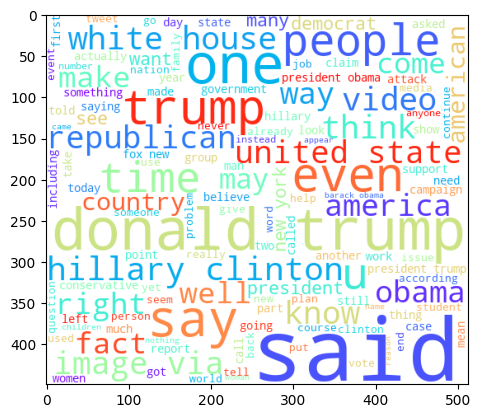

In [118]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

spam_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=' '))

plt.imshow(spam_wc)

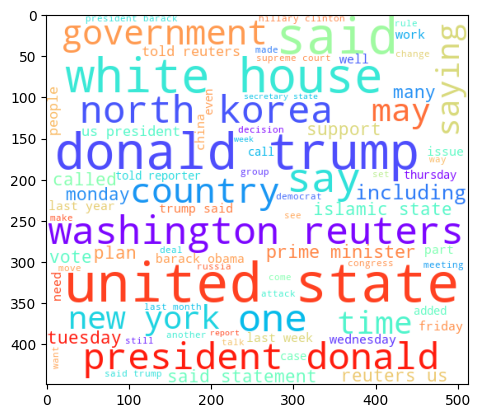

In [120]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

real_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=' '))

plt.imshow(real_wc)

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 5. Tokenization and Padding</h2>

In [3]:
df = pd.read_csv('../artifact/clean_content.csv')

In [4]:
df.sample(5)

,target,clean_text
16162,1,late thai kings remains returned palace night ...
28642,0,kkk threatened yearold woman fled hitler criti...
15718,1,uk parliament says government must publish sec...
25471,0,fact check us intelligence proves trump liar k...
6948,1,republicans aim coax trump toward house trade ...


In [5]:
# Replace NaN values with empty strings in the 'clean_text' column (or your target column)
df['clean_text'] = df['clean_text'].fillna('')

# Ensure all values in the 'clean_text' column are strings
df['clean_text'] = df['clean_text'].astype(str)

In [6]:
# split the data
X = df['clean_text']
y = df['target']

In [7]:
X.head(3)

0    us budget fight looms republicans flip fiscal ...
1    us military accept transgender recruits monday...
2    senior us republican senator let mr mueller jo...
Name: clean_text, dtype: object

In [8]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
# Set the maximum number of words in the vocabulary (5000 most frequent words)
vocab_size = 5000

# Set the maximum length for sequences (each text will be padded/truncated to 1000 tokens)
max_length = 100

# Set a token to represent out-of-vocabulary (OOV) words during tokenization
oov_token = "<OOV>"

Tokenization

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

tokenizer.fit_on_texts(X)

Padding

In [11]:
X_sequence = tokenizer.texts_to_sequences(X)

X_padded = pad_sequences(X_sequence,maxlen=max_length,padding='post')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 6. Model Training & Evaluation</h2>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

## ***1. Simple LSTM***

In [15]:
# Define embedding dimensions
embedding_dim = 100  # You can change this value

# Set sentence length as the max length of the padded sequences
sentence_length = max_length

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    LSTM(100),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8598 - loss: 0.3229 - val_accuracy: 0.9699 - val_loss: 0.0925
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9701 - loss: 0.0912 - val_accuracy: 0.9751 - val_loss: 0.0824
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9854 - loss: 0.0493 - val_accuracy: 0.9786 - val_loss: 0.0720
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9797 - val_loss: 0.0706
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9781 - val_loss: 0.0749


In [19]:
Simple_LSTM = model
model = Simple_LSTM

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [22]:
accuracy_score(y_test, y_pred)

0.9780711568583575

In [23]:
confusion_matrix(y_test, y_pred)

array([[4496,  152],
       [  44, 4246]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4648
           1       0.97      0.99      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [25]:
import pickle

In [26]:
# Save the model and tokenizer
Simple_LSTM.save('../models/simple_lstm_model.h5')
with open('../models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

## ***2. Bidirectional LSTM***

In [27]:
# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    Bidirectional(LSTM(100)),  # Wrap LSTM inside Bidirectional for better context learning
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.8884 - loss: 0.2544 - val_accuracy: 0.9793 - val_loss: 0.0658
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 47s 42ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9631 - val_loss: 0.1042
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step - accuracy: 0.9946 - loss: 0.0206 - val_accuracy: 0.9861 - val_loss: 0.0524
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 52s 47ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9840 - val_loss: 0.0575
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9735 - val_loss: 0.1082


In [31]:
Bi_LSTM = model
model = Bi_LSTM

Performance Metrics

In [32]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [33]:
accuracy_score(y_test, y_pred)

0.9734840008950548

In [34]:
confusion_matrix(y_test, y_pred)

array([[4624,   24],
       [ 213, 4077]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4648
           1       0.99      0.95      0.97      4290

    accuracy                           0.97      8938
   macro avg       0.98      0.97      0.97      8938
weighted avg       0.97      0.97      0.97      8938



In [36]:
# Save the model and tokenizer
Bi_LSTM.save('../models/bi_lstm_model.h5')

## ***3. Stacked LSTM (Deep LSTM)***

In [37]:
# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    LSTM(100, return_sequences=True),  # First LSTM layer with return_sequences=True for stacking
    Dropout(0.2),  # Regularization for the first LSTM layer
    LSTM(100),  # Second LSTM layer
    Dropout(0.2),  # Regularization for the second LSTM layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 76s 65ms/step - accuracy: 0.8715 - loss: 0.2817 - val_accuracy: 0.9485 - val_loss: 0.1489
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 76s 68ms/step - accuracy: 0.9564 - loss: 0.1292 - val_accuracy: 0.9441 - val_loss: 0.1577
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 77s 69ms/step - accuracy: 0.9629 - loss: 0.1087 - val_accuracy: 0.9809 - val_loss: 0.0679
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0.9563 - val_loss: 0.1288
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.9881 - loss: 0.0363 - val_accuracy: 0.9803 - val_loss: 0.0684


In [41]:
stacked_model = model
model = stacked_model

In [42]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


In [43]:
accuracy_score(y_test, y_pred)

0.9803087939136272

In [44]:
confusion_matrix(y_test, y_pred)

array([[4530,  118],
       [  58, 4232]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4648
           1       0.97      0.99      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [46]:
# Save the model
stacked_model.save('../models/stacked_lstm_model.h5')

## ***4. LSTM with Attention Mechanism***

In [47]:
from tensorflow.keras.layers import Attention, LSTM, Dense, Embedding, Dropout, Input
from tensorflow.keras.models import Model

# Input layer
input = Input(shape=(sentence_length,))
# Embedding layer
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input)
# First LSTM layer
lstm = LSTM(100, return_sequences=True)(embedding)
# Attention mechanism
attention = Attention()([lstm, lstm])  # Self-attention: query, key, and value are the same
# Second LSTM layer processing the context vector
context_vector = LSTM(100)(attention)
# Dropout for regularization
dropout = Dropout(0.2)(context_vector)
# Output layer
output = Dense(1, activation='sigmoid')(dropout)
# Define the model
model = Model(inputs=input, outputs=output)

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Summary of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 100, 100)  │    500,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 100, 100)  │     80,400 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 100, 100)  │          0 │ lstm_4[0][0],     │
│ (Attention)         │                   │            │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 100)       │     80,400 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 100)       │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        101 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 660,901 (2.52 MB)

 Trainable params: 660,901 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.8257 - loss: 0.3629 - val_accuracy: 0.9698 - val_loss: 0.0934
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.9737 - loss: 0.0826 - val_accuracy: 0.9763 - val_loss: 0.0766
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9881 - loss: 0.0426 - val_accuracy: 0.9783 - val_loss: 0.0718
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.9918 - loss: 0.0296 - val_accuracy: 0.9794 - val_loss: 0.0628
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 76s 68ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9797 - val_loss: 0.0734


In [51]:
AM_lstm_model = model
model = AM_lstm_model

Performance Metrics

In [52]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


In [53]:
accuracy_score(y_test, y_pred)

0.9797493846498098

In [54]:
confusion_matrix(y_test, y_pred)

array([[4569,   79],
       [ 102, 4188]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4648
           1       0.98      0.98      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [56]:
# Save the model
AM_lstm_model.save('../models/AM_lstm_model.h5')

## ***5. LSTM with Global Max Pooling***

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dropout, Dense

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    LSTM(100, return_sequences=True),  # Outputs a sequence for pooling
    GlobalMaxPooling1D(),  # Reduces sequence to feature vector by max pooling
    Dropout(0.2),  # Regularization
    Dense(1, activation='sigmoid')  # Binary classification output
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.8698 - loss: 0.2751 - val_accuracy: 0.9717 - val_loss: 0.0810
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9838 - loss: 0.0492 - val_accuracy: 0.9781 - val_loss: 0.0663
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9781 - val_loss: 0.0736
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9794 - val_loss: 0.0702
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 0.9796 - val_loss: 0.0837


In [61]:
LSTM_with_Max_Pooling = model
model = LSTM_with_Max_Pooling 

Performance Metrics

In [62]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [63]:
accuracy_score(y_test, y_pred)

0.9796375027970463

In [64]:
confusion_matrix(y_test, y_pred)

array([[4564,   84],
       [  98, 4192]], dtype=int64)

In [65]:
print(confusion_matrix(y_test, y_pred))

[[4564   84]
 [  98 4192]]


In [66]:
# Save the model
LSTM_with_Max_Pooling.save('../models/LSTM_with_Max_Pooling_model.h5')

## ***6. LSTM with GRU***

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dropout, Dense

In [68]:
# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    LSTM(100, return_sequences=True),  # LSTM layer returning sequences
    GRU(100),  # GRU layer processing the sequences from LSTM
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [69]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# Summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.8968 - loss: 0.2470 - val_accuracy: 0.9301 - val_loss: 0.2176
Epoch 2/5
1117/1118 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9471 - loss: 0.1454

In [43]:
LSTM_with_GRU_model = model
model = LSTM_with_GRU_model

Performance Metrics

In [44]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


In [45]:
accuracy_score(y_test, y_pred)

0.984224658760349

In [46]:
confusion_matrix(y_test, y_pred)

array([[4607,   41],
       [ 100, 4190]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4648
           1       0.99      0.98      0.98      4290

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938



In [48]:
# Save the model
LSTM_with_GRU_model.save('../models/LSTM_with_GRU_model.h5')

## ***7. CNN-LSTM Hybrid***

In [49]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [50]:
# Build the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sentence_length),
    # 1D Convolutional layer for feature extraction
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    # MaxPooling layer for dimensionality reduction
    MaxPooling1D(pool_size=4),
    # LSTM layer for sequential modeling
    LSTM(100),
    # Dropout for regularization
    Dropout(0.2),
    # Dense layer for binary classification
    Dense(1, activation='sigmoid')
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [51]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.9208 - loss: 0.1719 - val_accuracy: 0.9877 - val_loss: 0.0382
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9811 - val_loss: 0.0623
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9896 - val_loss: 0.0376
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9881 - val_loss: 0.0412
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9908 - val_loss: 0.0465


In [54]:
CNN_LSTM_Hybrid_model = model
model = CNN_LSTM_Hybrid_model

Performance Metrics

In [55]:
y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [56]:
accuracy_score(y_test, y_pred)

0.9908256880733946

In [57]:
confusion_matrix(y_test, y_pred)

array([[4597,   51],
       [  31, 4259]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



In [59]:
# Save the model
CNN_LSTM_Hybrid_model.save('../models/CNN_LSTM_Hybrid_model.h5')